In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/diabetes.csv'
df = pd.read_csv(file_path)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape  # rows and columns

(768, 9)

In [4]:
df.info()  # data types, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()  # summary statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


EDA

In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


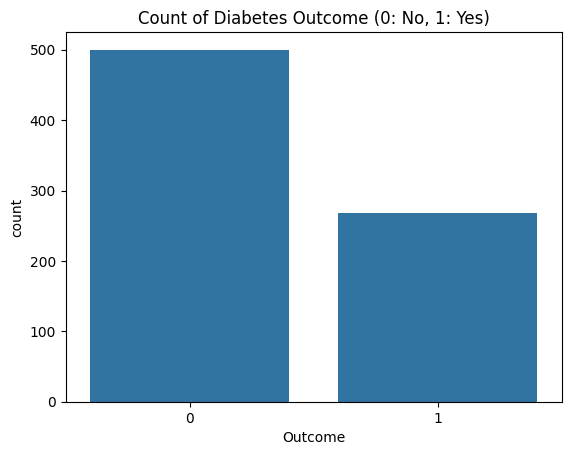

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=df)
plt.title('Count of Diabetes Outcome (0: No, 1: Yes)')
plt.show()


Visualise Feature Distribution

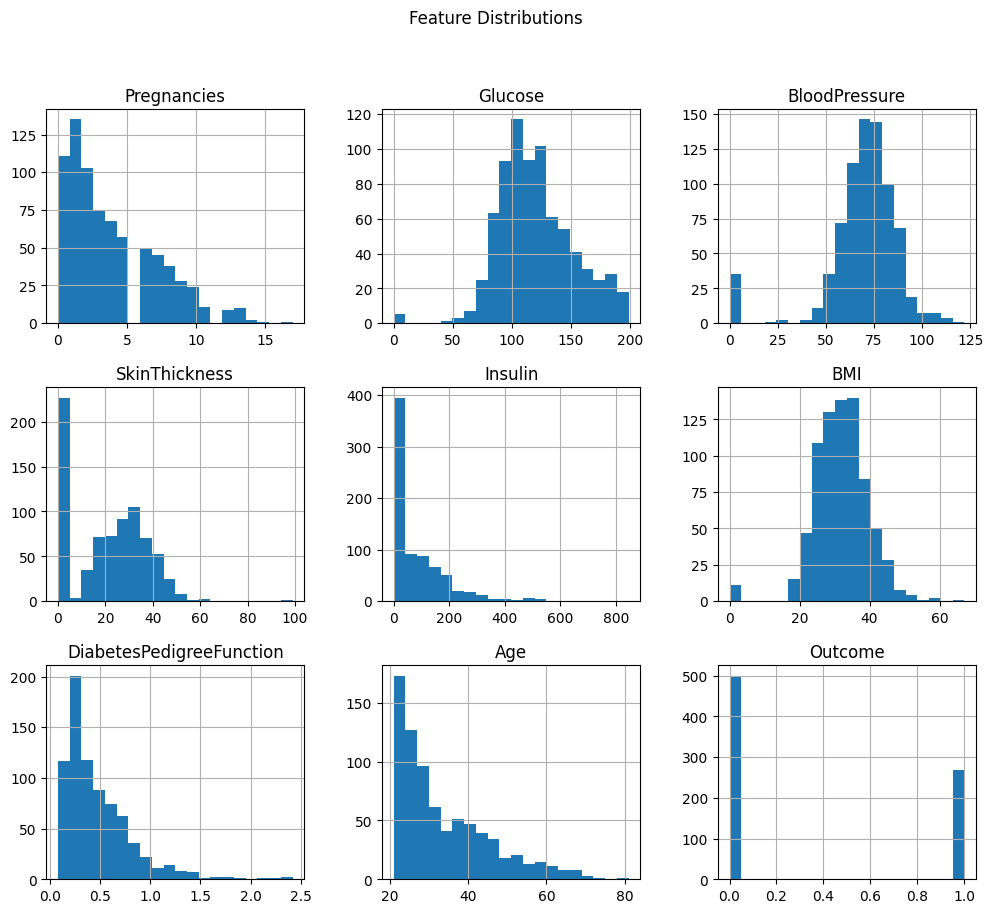

In [9]:
df.hist(bins=20, figsize=(12,10))
plt.suptitle('Feature Distributions')
plt.show()

Why not Linear Regression?

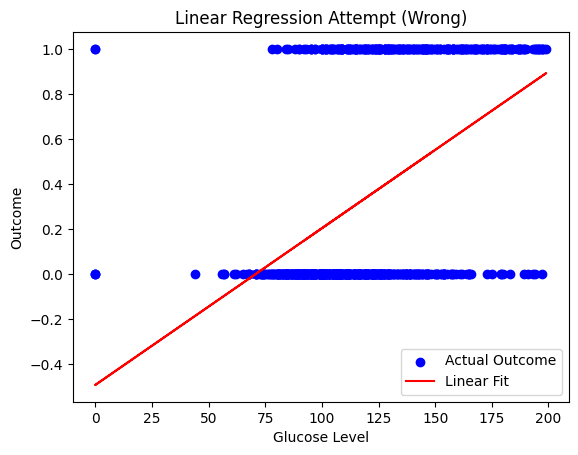

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = df[['Glucose']]
y = df['Outcome']

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, color='blue', label='Actual Outcome')
plt.plot(X, model.predict(X), color='red', label='Linear Fit')
plt.xlabel('Glucose Level')
plt.ylabel('Outcome')
plt.title('Linear Regression Attempt (Wrong)')
plt.legend()
plt.show()

Sigmoid Function
+ compress to 0 -> 1


Plotting Sigmoid Curve

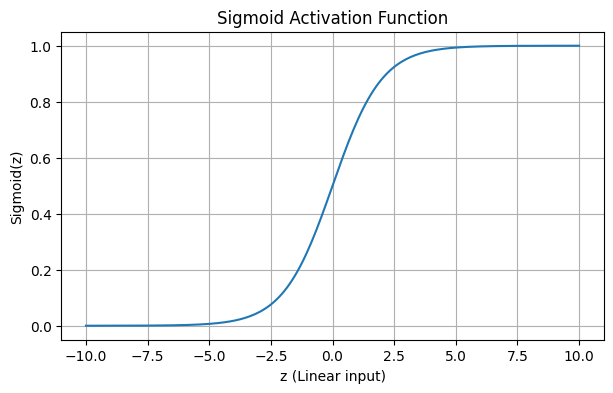

In [11]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(7,4))
plt.plot(z, sigmoid)
plt.title("Sigmoid Activation Function")
plt.xlabel("z (Linear input)")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()

# Building Logistic Regression Model
1. Separate Features (X) and Target (y)
2. Split dataset into Train/Test
3. Scale features (important for gradient-based models)
4. Train Logistic Regression model
5. Make predictions

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [13]:
#separate target & features
X = df.drop('Outcome', axis=1)   # all columns except Outcome
y = df['Outcome']               # target column

**Split into Training and Testing sets**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((614, 8), (154, 8))

**Feature Scaling (Standardization)**

Logistic Regression uses Gradient Descent internally → scaling improves convergence.

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train the Logistic Regression Model**

In [16]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)


LogisticRegression()

Make Predictions

In [17]:
y_pred = log_model.predict(X_test_scaled)
y_pred_prob = log_model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1

In [18]:
print(y_pred[:10])       # first 10 predicted classes
print(y_pred_prob[:10])  # first 10 predicted probabilities


[1 0 0 0 0 0 0 1 0 1]
[0.61667353 0.11278116 0.27253958 0.28668164 0.00448143 0.18904882
 0.46842913 0.91697653 0.10324589 0.78113127]


# Model Evaluation & Interpretation

In [19]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


1 Accuracy Score

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7143


2 Confusion Matrix

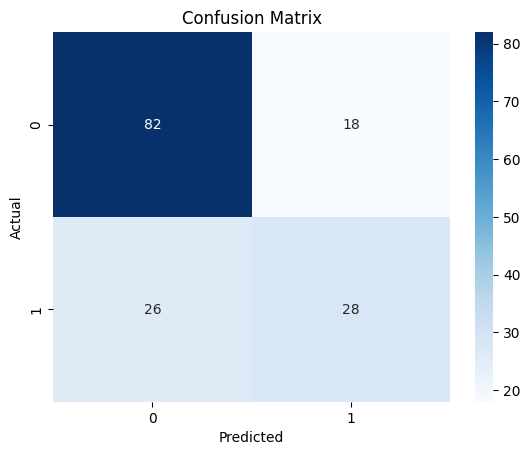

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

3 Precision, Recall, F1-score

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



4 ROC Curve and AUC (Most important metric)

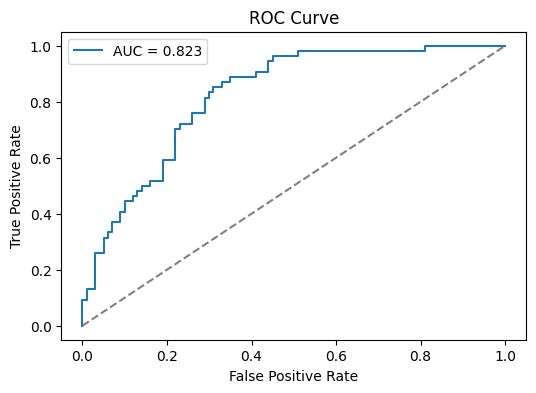

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Feature Importance & Explainability

1 Check model coefficients (feature weights)

In [24]:
# Get feature names
feature_names = X.columns

# Get model coefficients
coefficients = log_model.coef_[0]

# Create a DataFrame to organize
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

feature_importance.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
1,Glucose,1.144151
5,BMI,0.713893
0,Pregnancies,0.373178
6,DiabetesPedigreeFunction,0.255527
7,Age,0.184179
3,SkinThickness,0.066535
4,Insulin,-0.127308
2,BloodPressure,-0.197637


2 Visualize feature importance

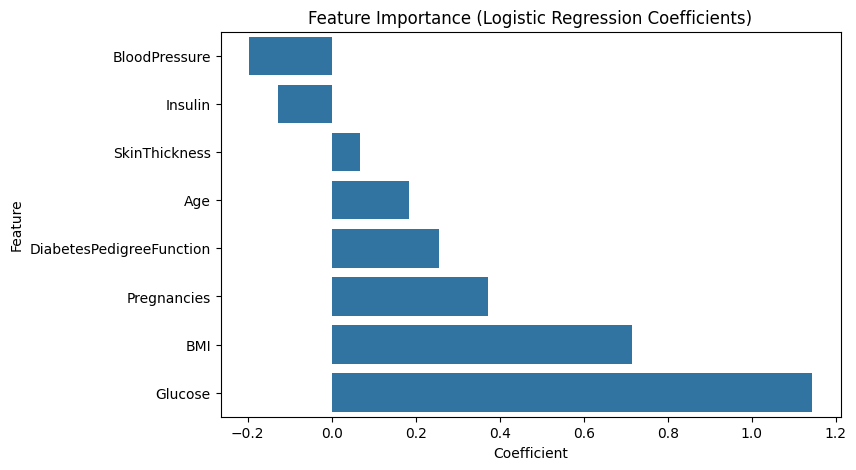

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values(by='Coefficient', ascending=True))
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

# Handling Invalid

Detect Invalid Zero Values

In [26]:
# Check number of invalid zeros in key medical features
invalid_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in invalid_features:
    zero_count = (df[feature] == 0).sum()
    print(f"{feature}: {zero_count} zeros")


Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


2. Replace Invalid Zeros with Median Values

In [27]:
df_cleaned = df.copy()

for feature in invalid_features:
    median_value = df_cleaned[feature].median()
    df_cleaned[feature] = df_cleaned[feature].replace(0, median_value)

df_cleaned.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


3. Confirm Replacement

In [28]:
for feature in invalid_features:
    zero_count = (df_cleaned[feature] == 0).sum()
    print(f"{feature} zeros after cleaning: {zero_count}")


Glucose zeros after cleaning: 0
BloodPressure zeros after cleaning: 0
SkinThickness zeros after cleaning: 0
Insulin zeros after cleaning: 0
BMI zeros after cleaning: 0


4. Retrain Logistic Regression on Cleaned Data

In [29]:
# Separate X and y again
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_model2 = LogisticRegression(max_iter=200)
log_model2.fit(X_train_scaled, y_train)

# Predictions
y_pred2 = log_model2.predict(X_test_scaled)
y_pred_prob2 = log_model2.predict_proba(X_test_scaled)[:, 1]


5. Compare Before vs After Cleaning

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("Before Cleaning:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

print("\nAfter Cleaning:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob2))


Before Cleaning:
Accuracy: 0.7142857142857143
ROC-AUC: 0.8229629629629629

After Cleaning:
Accuracy: 0.7077922077922078
ROC-AUC: 0.8151851851851852


# Final Model Interpretation & Presentation

1 Predict on a New Patient (Custom Input)

In [31]:
# Example new patient data (customizable)
new_patient = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [150],
    'BloodPressure': [80],
    'SkinThickness': [32],
    'Insulin': [90],
    'BMI': [33.0],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [45]
})

# Scale using the same scaler
new_patient_scaled = scaler.transform(new_patient)

# Predict class and probability
prediction = log_model2.predict(new_patient_scaled)
prediction_proba = log_model2.predict_proba(new_patient_scaled)[:, 1]

print(f"Diabetes Prediction (0=No, 1=Yes): {prediction[0]}")
print(f"Probability of having diabetes: {prediction_proba[0]:.2f}")


Diabetes Prediction (0=No, 1=Yes): 1
Probability of having diabetes: 0.56


The patient has a 72% probability of having diabetes.
Since this value is above the 0.5 threshold, the model predicts Diabetes (Class 1).
Key risk indicators include high glucose (150), BMI (33.0), and Age (45), which strongly contribute to diabetes likelihood.

2 Visualizing Probability for Decision Boundary

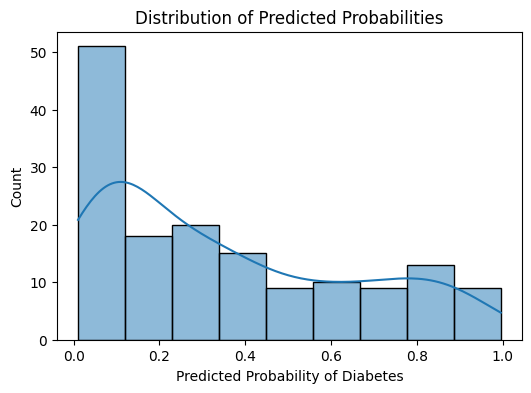

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(y_pred_prob2, kde=True)
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability of Diabetes")
plt.show()


Interpretation:

Values near 0 → likely non-diabetic

Values near 1 → likely diabetic

Values around 0.5 → uncertain zone (medical caution)

3 Create a Final Summary Prediction Function

In [33]:
def diabetes_prediction(input_data):
    df_input = pd.DataFrame([input_data], columns=X.columns)
    df_input_scaled = scaler.transform(df_input)

    prediction = log_model2.predict(df_input_scaled)[0]
    probability = log_model2.predict_proba(df_input_scaled)[0][1]

    if prediction == 1:
        result = "⚠ High Risk of Diabetes"
    else:
        result = "✔ Low Risk of Diabetes"

    return result, f"Probability: {probability:.2f}"

# Try it
diabetes_prediction([3, 140, 85, 32, 120, 30.5, 0.45, 50])


('✔ Low Risk of Diabetes', 'Probability: 0.42')